# an example to draw a heatmap using seaborn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

In [2]:
germlinegenes = set([])
for line in open('/sonas-hs/atwal/hpc/home/ytanigaw/data/germlinegenes.txt', 'r'):
    germlinegenes.add(line[:-1])

In [3]:
def plot_heatmap(file):
    sys.setrecursionlimit(10000)
    table = pd.read_table(file, index_col = 0).iloc[:, :430]
    is_on_list = [x in germlinegenes for x in table.index]
    patients = [x[:x.find('_')] for x in table.columns]
    patients_set = set(patients)
    patients_color_dict = dict(zip(list(patients_set), sns.color_palette("hls", len(patients_set))))
    patients_color = [patients_color_dict[x] for x in patients]
    g = sns.clustermap(table,
                       method="single", metric="cosine", 
                       row_colors=[sns.color_palette("hls", 2)[int(x)] for x in is_on_list],
                       col_colors=patients_color)

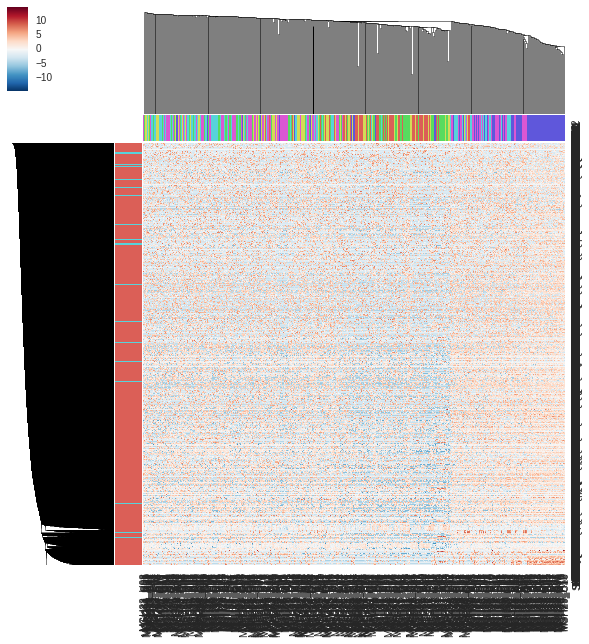

In [4]:
infile = '/sonas-hs/atwal/hpc/home/ytanigaw/data/2016_InformationBottleneck/GSE57872_GBM_data_matrix.txt'
table = plot_heatmap(infile)

- row: genes
  - row color
    - blue: germ line gene
- col: cells
  - col color corresponds to patients

# How to check the disk quota on cluster

In [5]:
!df -h |grep atwal

sonas-hs-int4:/ibm/gpfs/atwal/hpc/data
                      2.0T  117G  1.9T   6% /sonas-hs/atwal/hpc/data
sonas-hs-int4:/ibm/gpfs/atwal/hpc/home/data
                      1.0T  661G  364G  65% /sonas-hs/atwal/hpc/home


# qsub, qstat, qdel, ...

In [8]:
!qstat

job-ID     prior   name       user         state submit/start at     queue                          jclass                         slots ja-task-ID 
------------------------------------------------------------------------------------------------------------------------------------------------
  11361756 0.50309 IBcompute. ytanigaw     r     02/09/2016 21:41:46 primary.q@bnbcompute13                                            1        
  11361757 0.50309 IBcompute. ytanigaw     r     02/09/2016 21:42:01 primary.q@bnbcompute38                                            1        
  11367732 0.50309 SRP042161_ ytanigaw     r     02/10/2016 20:40:02 primary.q@bnbcompute37                                            1        


In [15]:
!cat /sonas-hs/atwal/hpc/home/ytanigaw/scripts/20160210/SRP042161_DL.sh

#!/bin/bash

#$ -S /bin/bash
#$ -v LD_LIBRARY_PATH
#$ -cwd

# Send mail to these users
#$ -M ytanigaw@cshl.edu

# Mail at beginning/end/on suspension
#$ -m bes
##################################################
cat $0 >&2

DOWNLOAD_DIR="/sonas-hs/atwal/hpc/data/ytanigaw/SRP042161/"
target="ftp://ftp-trace.ncbi.nlm.nih.gov/sra/sra-instant/reads/ByStudy/sra/SRP%2FSRP042%2FSRP042161/"

wget -l 2 -r -nd -P ${DOWNLOAD_DIR} ${target}

##################################################


In [14]:
!qstat -j 11367732

job_number:                 11367732
jclass:                     NONE
exec_file:                  job_scripts/11367732
submission_time:            02/10/2016 20:39:56.882
owner:                      ytanigaw
uid:                        7735
group:                      atwallabnew
gid:                        10792
sge_o_home:                 /sonas-hs/atwal/hpc/home/ytanigaw
sge_o_log_name:             ytanigaw
sge_o_path:                 /sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/pyenv-virtualenv/shims:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/libexec:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/python-build/bin:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/pyenv-virtualenv/bin:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/pyenv-update/bin:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/pyenv-installer/bin:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/plugins/pyenv-doctor/bin:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/shims:/sonas-hs/atwal/hpc/home/ytanigaw/.pyenv/bin:/opt/uge